<a href="https://colab.research.google.com/github/randaz99/DataScienceCommittee/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# how to use google drive #
from google.colab import drive
drive.mount('/content/drive')

# takes the training data spreadsheet (csv) and puts it into two panda arrays #
trainData = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data Science/Competitions/Titanic/train.csv")
testData = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data Science/Competitions/Titanic/test.csv")


def family(trainData, testData):
  trainData["Family"] = trainData["SibSp"] + trainData["Parch"]
  testData["Family"] = testData["SibSp"] + testData["Parch"]

  print("   Created 'Family' column.")


# FILLING in NULLS #
def wrangleQ0(trainData, testData):
  trainData["Cabin"] = trainData["Cabin"].fillna('?')
  testData["Cabin"] = testData["Cabin"].fillna('?')

  trainData["Age"] = trainData["Age"].fillna(0)
  testData["Age"] = testData["Age"].fillna(0)

  trainData["Fare"] = trainData["Fare"].fillna(0)
  testData["Fare"] = testData["Fare"].fillna(0)

  print("   Nulls Filled.")


# Remove rows with nulls in them #
def wrangleDelNull(trainData, testData):
  trainData.dropna(inplace=True)
  testData.dropna(inplace=True)


from sklearn.preprocessing import normalize
from sklearn.preprocessing import MinMaxScaler
def wrangleNorm(trainData, testData, exclude=[]):
  # change this to do all numeric columns!
  tempDF = testData.select_dtypes(include=np.number)
  columns = []

  for col in tempDF.columns:
    if (col not in exclude):
      columns = columns + [col]

  for col in columns:
      trainData[col] = (trainData[col] - trainData[col].min()) / (trainData[col].max() - trainData[col].min())
      testData[col] = (testData[col] - testData[col].min()) / (testData[col].max() - testData[col].min())

  print("   Normalized numeric columns.")


def printData():
  print(f"Train data=\n{trainData}")
  print(f"Test data=\n{testData}")


!pip install tensorflow_decision_forests
import tensorflow_decision_forests as tfdf
# This predicts importance of our features #
def predictImportance(trainData):
    tfDataSet = tfdf.keras.pd_dataframe_to_tf_dataset(trainData, label='Survived')

    model = tfdf.keras.RandomForestModel()
    model.fit(tfDataSet)

    print(model.summary())


from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import cross_val_score
# we probably dont need all these #
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from matplotlib import pyplot as plt
# This tests the models #
def testModels(trainData,features):
    print(f"\n{features}")
    # what we want to predict #
    y = trainData["Survived"]

    # Change Categorical to numeric #
    X = pd.get_dummies(trainData[features])

    names = ["RandomForest200",
         "LinearSVC",
         "MultinomialNB",
         "Logistic",
         "KNN5",
         "SVCLinear",
         "SVCgamma2",
         "DecisionTree5",
         "RandomForest5-10",
         #"MLP-2000-1000-500-100",
         "AdaBoost",
         "HistGradientBoost"
        ]

    abrevNames = ["RF2",
         "LSVC",
         "MNB",
         "Log",
         "KNN5",
         "SVCL",
         "SVCg",
         "DT5",
         "RF51",
         #"MLP",
         "AB",
         "HGB"
        ]

    models = [
        RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
        LinearSVC(max_iter=1000, dual=False),
        MultinomialNB(),
        LogisticRegression(random_state=0),
        KNeighborsClassifier(5),
        SVC(kernel="linear", C=0.025),
        SVC(gamma=2, C=1),
        DecisionTreeClassifier(max_depth=5),
        RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
        #MLPClassifier(hidden_layer_sizes=(2000,1000,500,100)),
        #MLPClassifier(hidden_layer_sizes=(100,50,10)),
        AdaBoostClassifier(),
        HistGradientBoostingClassifier(categorical_features=[])
    ]

    results = []

    i = 0
    for model in models:
        kfold = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
        model_name = names[i]
        i = i + 1
        cv_results = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
        results.append(cv_results)
        print('%s: %f (%f)' % (model_name, cv_results.mean(), cv_results.std()))

    plt.boxplot(results, labels=abrevNames)
    plt.title('Algorithm Comparison')
    plt.show()


def outPrediction(trainData,testData):
    # what we want to predict #
    y = trainData["Survived"]

    # features that mater!! #
    features = ["Sex","Fare","Age"]

    # Change Categorical to numeric #
    X = pd.get_dummies(trainData[features])
    XTest = pd.get_dummies(testData[features])

    model = HistGradientBoostingClassifier(categorical_features=[])
    model.fit(X, y)

    cv_results = cross_val_score(model, X, y, scoring='accuracy')
    result = cv_results
    name = "Hist"
    print()
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    print()

    predictions = model.predict(XTest)
    return predictions


def outputPredictionsList(trainData,testData,features):
    print(f"   Using Features: {features}")
    # what we want to predict #
    y = trainData["Survived"]

    # Change Categorical to numeric #
    X = pd.get_dummies(trainData[features])
    XTest = pd.get_dummies(testData[features])

    models = [
        RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
        LinearSVC(max_iter=1000, dual=False),
        MultinomialNB(),
        LogisticRegression(random_state=0),
        KNeighborsClassifier(5),
        SVC(kernel="linear", C=0.025),
        SVC(gamma=2, C=1),
        DecisionTreeClassifier(max_depth=5),
        RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
        #MLPClassifier(hidden_layer_sizes=(2000,1000,500,100)),
        #MLPClassifier(hidden_layer_sizes=(100,50,10)),
        AdaBoostClassifier(),
        HistGradientBoostingClassifier(categorical_features=[])
    ]

    predictionsList = []

    for model in models:
        model.fit(X, y)
        prediction = model.predict(XTest)
        predictionsList.append(prediction)

    return np.array(predictionsList)


def outputConcensus(preditcionsList):
  concensus = np.mean(predictionsList, axis=0)
  #print(concensus)
  return (np.rint(concensus)).astype(int)


# Create an output dataframe and write it to csv file #
def modelToCSV(testData,prediction):
    output = pd.DataFrame({'PassengerId': testData.PassengerId, "Survived": prediction})
    output.to_csv('submission.csv', index=False)

    # just so we can see the submission in the console #
    submission = pd.read_csv('submission.csv')
    print(submission)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 31.5 MB/s eta 0:00:00



Wrangling...
   Nulls Filled.
   Normalized numeric columns.

Creating Features...
   Created 'Family' column.
Use /tmp/tmp67or0ztq as temporary training directory
Reading training dataset...
Training dataset read in 0:00:09.713132. Found 891 examples.
Training model...
Model trained in 0:00:02.066708
Compiling model...
Model compiled.
Model: "random_forest_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1 (1.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 1 (1.00 Byte)
_________________________________________________________________
Type: "RANDOM_FOREST"
Task: CLASSIFICATION
Label: "__LABEL"

Input Features (12):
	Age
	Cabin
	Embarked
	Family
	Fare
	Name
	Parch
	PassengerId
	Pclass
	Sex
	SibSp
	Ticket

No weights

Variable Importance: INV_MEAN_MIN_DEPTH:
    1.         "Sex"  0.477895 ################
    2.        "Fare"  0.252420 ######
    3.      "Pclass"  0.17

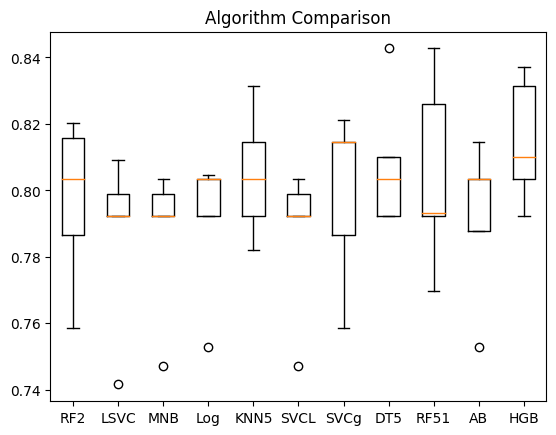


Predicting...
   Using Features: ['Sex', 'Fare', 'Age', 'SibSp', 'Parch']
     PassengerId  Survived
0            892         0
1            893         1
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]


In [ ]:
# Function calls below #

# Wrangling #
print('\nWrangling...')
wrangleQ0(trainData, testData)
#wrangleDelNull(trainData, testData)
wrangleNorm(trainData, testData, exclude=["PassengerId"])
#printData()

# Feature Enginering #
print('\nCreating Features...')
family(trainData, testData)
#printData()

# feature sets! #
features = ["Sex","Fare","Age","SibSp","Parch"]
features1 = ["Sex","Fare","Age","Family"]
features2 = ["Sex","Fare","Age","Family","Pclass"]
featuresALL = ["Sex","Fare","Age","Family","Pclass","Name","Ticket","Cabin","Embarked","PassengerId"]

predictImportance(trainData)
testModels(trainData,features)
#testModels(trainData, features1)
#testModels(trainData, features2)
#testModels(trainData, featuresALL)

# For submissions #
print('\nPredicting...')
#prediction = outPrediction(trainData, testData)
predictionsList = outputPredictionsList(trainData,testData,features)
#print(predictionsList)
concensus = outputConcensus(predictionsList)
#print(concensus)
modelToCSV(testData,concensus)